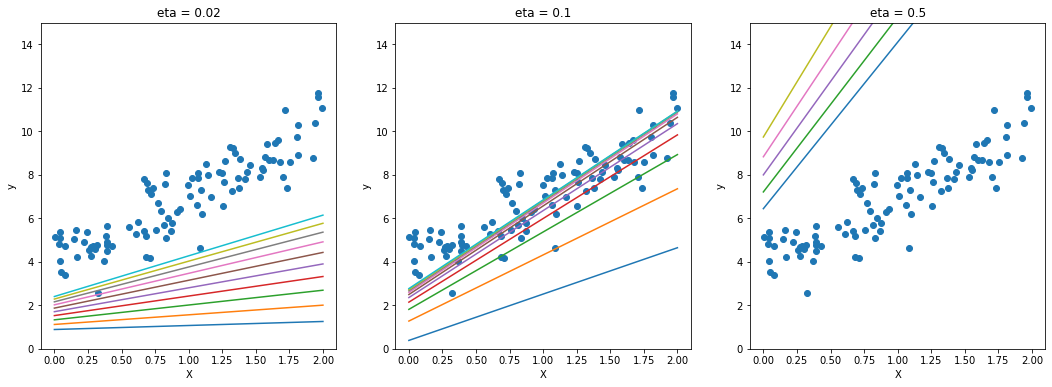

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X]

eta_array = [0.02, 0.1, 0.5] # 학습률
n_iterations = 10
m = 100

plot_point = np.array([[1., 0.], [1., 2.]])
subplot_code = 130

plt.figure(figsize=(18, 6))
for eta in eta_array:
  subplot_code += 1
  plt.subplot(subplot_code)
  plt.scatter(X, y)

  theta = np.random.randn(2, 1)

  for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= eta * gradients

    plt.plot([0., 2.], plot_point.dot(theta).flatten())
  plt.ylim(0, 15)
  plt.xlabel('X')
  plt.ylabel('y')
  plt.title('eta = ' + str(eta))

plt.show()

위 그래프 3개를 보면 가장 왼쪽의 그래프 같은 경우 학습률이 매우 낮아, 최적점에 도달하는 속도가 다른 그래프에 비해 느리다. 실험해 본 결과, 학습률이 0.1일 때 가장 적절한 속도로 학습하고 있는 것 같다.

보통 반복 횟수는 아주 크게 지정한 뒤, 벡터의 노름이 허용오차(tolerance)보다 작아지면 경사 하강법이 (거의)최솟값에 도달한 것이므로 알고리즘을 중지한다.

> 비용함수가 볼록함수이고, 기울기가 급격하게 변하지 않는 경우(예를들어 MSE), 학습률을 고정한 배치경사하강법은 어느 정도 시간이 걸리겠지만, 결국 최적의 솔루션에 수렴한다.비용함수의 모양에 따라 달라지겠지만, ε 범위 안에서 최적의 솔류션에 도달하기 위해서는 O(1/ε)의 반복이 걸린다. 다시 말해, 허용 오차 ε을 1/10으로 줄이면 반복횟수는 10배가 늘어난다.

#### 4.2.2 확률적 경사 하강법

배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그레디언트를 계산한다는 사실이다. 훈련 세트가 커지면 매우 느려지게 된다. 이와는 정반대로, 확률적 경사하강법은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산한다.

* 매 반목에서 다뤄야 할 데이터가 적기 때문에 계산이 빠르다.
* 매우 큰 데이터로 학습시킬 수 있다. (온라인 알고리즘)

단점은 다음과 같다.
* 확률적이므로, 이 알고리즘은 배치 경사 하강법보다 훨씬 불안정하다. 비용함수가 최솟값에 다다를 때 까지 부드럽게 감소하지 않고 위아래로 요동치며, 평균적으로 감소한다.
* 무작위적으로 데이터를 뽑기때문에, 전역 최솟값에 다다르지 못하게 한다는 점에서는 좋지 않다. 이러한 딜레마를 해결하는 한 가지 방법은, 학습률을 점진적으로 감소시키는 것이다. 시작할 때는 학습률을 크게 하고, 학습을 해나갈 수록, 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하도록 한다.

매 반복에서 학습률을 결정하는 함수를 학습 스케쥴`learning schedule` 이라고 한다.

In [ ]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(m * epoch + i)
    theta -= eta * gradients

theta

array([[3.90075641],
       [3.11058032]])

샘플을 무작위로 선택하기 때문에, 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고, 어떤 샘플은 전혀 선택되지 못할 수도 있다. 알고리즘이 에포크마다 모든 샘플을 사용하게 하려면, 훈련 세트를 섞은 후 차례대로 하나씩 선택하고, 다음 에포크에서 다시 섞는 식의 방법을 사용할 수 있다.

> 확률적 경사 하강법을 사용할 때, 훈련 샘플이 IID(independent and identically distributed)를 만족해야 평균적으로 파라미터가 전역 최적점을 향해 진행한다고 보장할 수 있다. 이렇게 만드는 간단한 방법은 훈련을 하는 동안 샘플을 섞는 것이다.

사이킷런에서 SGD 방식으로 선형 회귀를 사용할려면 `SGDRegressor`을 사용해야 한다.

> `SGDRegressor` 에서 학습스케줄을 의미하는 매개변수 `learning_rate`의 기본값은 `inscaling`으로, 반복횟수 t와 `eta0`, `power_t` 두 매개변수를 사용한 다음 공식으로 학습률을 계산한다.

> n<sup>(t)</sup> = eta0 / t<sup>power_t</sup>

In [ ]:
from sklearn.linear_model import SGDRegressor

sed_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sed_reg.fit(X, y.ravel())

sed_reg.intercept_, sed_reg.coef_

(array([3.87103338]), array([3.07995606]))

#### 4.2.3 미니매치 경사 하강법

### 4.3 다항 회귀

각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것을 다항회귀`polynomial regression`이라고 한다.

먼저 간단한 2차 방정식으로 비선형 데이터를 생성하겠다.

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

확실히 직선은 이 데이터에 잘 맞지 않을 것이므로, 사이킷런의 `PolynomialFeatures`를 사용해 훈련 데이터를 변환해보겠다.

> `PolynomialFeatures`에서 `interaction_only=Ture`로 지정하면 거듭제곱이 포함된 항은 모두 제외된다. `get_feature_names()` 메서드를 호출하면 특성의 차수를 쉽게 확인할 수 있다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X_poly[0]

array([-1.29137138,  1.66764004])

이 확장된 데이터에 `LinaerRegression`을 적용해보겠다.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.95714273]), array([[0.91337457, 0.52060496]]))

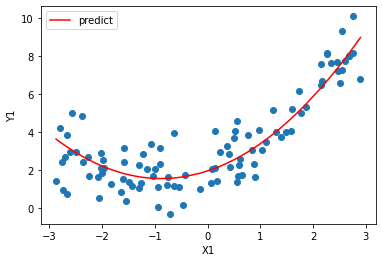

In [ ]:
plt.scatter(X_poly[:, 0], y)

X_poly_sort = np.argsort(X_poly[:, 0])
y = lin_reg.predict(X_poly).ravel()
plt.plot(X_poly[X_poly_sort, 0], y[X_poly_sort], color='r', label='predict')
plt.legend()
plt.xlabel('X1')
plt.ylabel('Y1')
plt.show()

일반적으로 잘 학습된 것처럼 보인다. 특성이 여러 개일 때, 다항 회귀는 이 특성 사이의 관계를 찾을 수 있다.

### 4.4 학습 곡선

고차 다항 회귀를 적용하면, 차수가 높아질 수록 과대적합이 잘일어난다. 어떤 모델의 과대적합 여부를 알아보기 위해서는 훈련 세트와 검증 세트의 학습 곡선을 동시에 그려보면 된다.

In [ ]:
def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train set')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val set')
  plt.legend()
  plt.ylabel('RMSE')
  plt.xlabel('val set size')
  plt.ylim(0, 3.0)
  plt.show()

단순 선형 모델의 학습 곡선을 살펴보자.

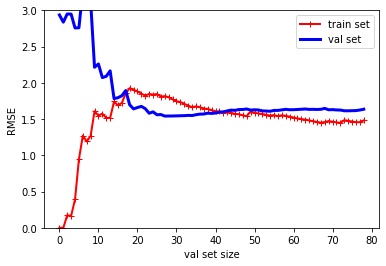

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

위 학습곡선은 과소적합 모델의 전형적인 모습이다. 두 곡선이 수형한 구간을 만들고, 꽤 높은 오차에서 매우 가까이 근접하여있다.

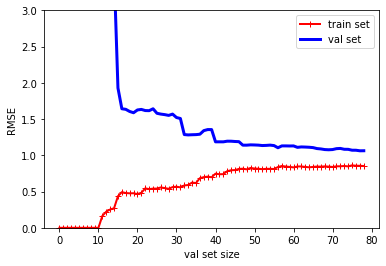

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline([
  ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
  ('lin_ref', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

이 학습 곡선은 이전과 비슷해 보이지만, 두 가지 매우 중요한 차이점이 있다.

* 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.
* 두 곡선 사이에 공간이 있다. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 이는 과대적합 모델의 특징이다. 그러나 더 큰 훈련세트를 사용하면 두 곡선이 점점 가까워진다.

> 과대적합 모델을 개선하는 한 가지 방법은 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가하거나, 가중치의 개수를 줄이는 것이다.

> **[편향/분산 트레이드오프]**<br>
통계학과 머신러닝에서 나온 중요한 이론 하나는 모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현할 수 있다는 사실이다.<br><br>
* **편향**<br>
일반화 오차 중에서 편향은 잘못된 가정으로 인한 것이다. 예를 들어 데이터가 실제로는 2차인데, 선형으로 가정하는 경우이다. 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉽다.
* **분산**<br>
분산(variance)은 훈련 데이터에 있는 작은 변동에 모델이 과조하게 민감하기 때문에 나타난다. 자유도가 높은 모델이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 있다.
* **줄일 수 없는 오차**<br>
줄일 수 없는 오차(irreducible error)는 데이터 자체에 있는 잡음 때문에 발생한다. 이 오차를 줄일 수 있는 유일한 방법은 데이터에서 잡음을 제거하는 것이다.




### 4.5 규제가 있는 선형 모델

과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것이다. 자유도를 줄이면 데이터에 과대적합되기 더 어려워진다. 다항 회귀 모델에서는 다항식의 차수를 줄임으로써, 과대적합을 방지하였다.

선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가한다. 이번 단계에서는 각기 다른 방법으로 가중치를 제한하는 '릿지' 회귀, '라쏘' 회귀, 엘라스틱넷을 살펴보겠다.

#### 4.5.1 릿지 회귀

릿지 회귀(ridge)는 규제가 추가된 선형 회귀 버전이다. 식은 다음과 같다.

> J(𝜃) = MSE(𝜃) + 1/2 * α * sum(𝜃<sub>i</sub><sup>2</sup>)

α 는 모델을 얼마나 많이 규제할지 조절한다. α = 0이면 릿지 회귀는 선형 회귀와 같아지고, α가 아주 크면 모든 가중치가 0에 가까워지며, 데이터의 평균을 지나는 수평선이 된다.


편향 𝜃<sub>0</sub>는 규제되지 않는다. W를 특성의 가중치 벡터(𝜃<sub>1</sub> ~ 𝜃<sub>n</sub>)라고 정의하면 규제항은 1/2 * ||W<sub>2</sub>||<sup>2</sup> 와 같다. 여기서 ||W<sub>2</sub>||는 가중치 벡터의 l2 노름이다.

> 릿지 회귀는 입력 특성의 스케일에 민감하기 때문에, 수행하기 전에 데이터의 스케일을 맞추는 것이 중요하다. (예를 들어 StandardScaler() 같은.)

선형 회귀와 마차낙지로, 릿지 회귀를 계산하기 위해 정규방정식을 사용할 수도 있고, 경사하강법을 사용할 수도 있다.

정규방정식은 다음과 같다.

> 𝜃 = (X<sup>T</sup>X + αA)<sup>-1</sup>X<sup>T</sup>y

`solver='cholesky'` 인수로 설정하면 안드레 루이 숄레스키가 발견한 행렬 분해를 사용하여, 정규방정식을 계산한다.(효율이 더 좋다.) 


이번에는 선형 데이터에 몇 가지 다른 α를 사용해 릿지 모델을 훈련시킨 결과이다. 왼쪽 그래프는 평범한 릿지 모델을 사용해 선형적인 예측을 만들었다. 오른쪽 그래프는 다항 회귀로, 특성의 차원수를 늘린 후, `StandardScaler()`를 사용해 표준화를 진행한 뒤, 릿지 모델로 학습하였다.

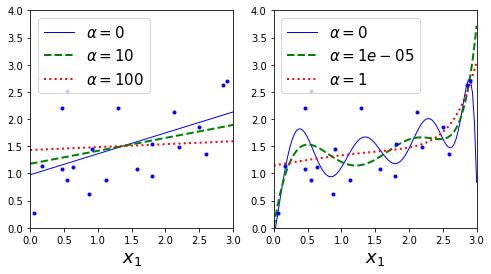

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
  for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=[0, 10, 100])
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=[0, 1e-05, 1])
plt.show()

오른쪽 그래프를 보면 α 값이 커질수록 직선에 가까워지는 것을 알 수 있다. 모델의 분산은 작아지지만, 편향은 커지고 있는 것이다.

아래 공식 처럼 릿지 회귀를 사용할 수 있다.

In [ ]:
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

`SGDRegressor`에서 릿지 회귀를 사용하려면 `penalty='l2'`라고 하면 된다.

In [ ]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46543286])

#### 4.5.2 라쏘 회귀

라쏘(Lasso) 회귀는 선형 회귀의 또 다른 규제된 버전이다. 릿지 회귀처럼 비용 함수에 규제항을 더하지만 l2 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 l1 노름을 사용한다.

> J(𝜃) = MSE(𝜃) + α * sum(|𝜃<sub>i</sub>|)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


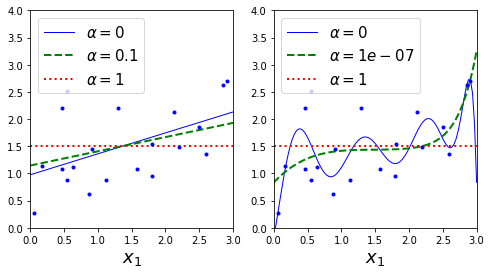

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=[0, 0.1, 1], random_state=42)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=[0, 1e-07, 1], random_state=42)
plt.show()

라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 제거하려고 한다는 점이다. (즉 가중치가 0이 된다.) 예를 들어 오른쪽 그래프에서 점선(α=1e-7)은 3차방정식처럼 보인다. 차수가 높은 다항 특성의 가중치가 0이 된 것이다.

다시 말해, 라쏘 회귀는 자동으로 특성 선택을 하고, 희소 모델(sparse matrix)를 만든다.

> 라쏘와 릿지 규제의 가장 큰 차이점은 다음과 같다.
* 릿지 모델 같은 경우 파라미터가 전역 최적점에 가까워질수록 그레이디언트가 작아진다. 따라서 경사 하강법이 자동으로 느려지고, 수렴에 도움이 된다.
* α를 크게 잡을수록 최적의 파라미터가 원점에 더 가까워진다.

> 라쏘 같은 경우 경사 하강법을 사용할 때, 최적점 근처에서 진동을 하는데, 이를 방지할려면 학습을 진행할수록 학습률을 점차 줄여나가는 learning schedule을 사용해야 한다.

라쏘의 비용함수는 𝜃<sub>i</sub>=0 (i=1, 2, 3, ..., n)에서 미분 가능하지 않다. 하지만 𝜃<sub>i</sub>=0일 때 서브그레이디언트 벡터(subgradient vector) g를 사용하면 경사 하강법을 적용하는 데 문제가 없다. 공식은 다음과 같다.

> g(𝜃, J) = MSE(𝜃) + α(sign(𝜃<sub>1</sub>) + sign(𝜃<sub>2</sub>) + ... + sign(𝜃<sub>n</sub>)), <br>
sign(𝜃<sub>i</sub>) = <br>-1 if 𝜃<sub>i</sub> < 0<br> 0 if 𝜃<sub>i</sub> = 0<br> -1 if 𝜃<sub>i</sub> > 0



다음은 `Lasso` 클래스를 사용한 간단한 사이킷런 예제이다. 

In [ ]:
from sklearn.linear_model import Lasso


lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

다음과 같이 경사하강법에서도 라쏘 규제를 사용할 수 있다.

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46938541])

#### 4.5.3 엘라스틱넷

엘라스틱넷은 릿지 회귀와 라쏘 회귀를 절충한 모델이다. 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용해 조절한다. r=0이면 엘라스틱넷은 릿지 회귀와 같고, r=1이면 라쏘 회귀와 같다. 식은 다음과 같다.

> J(𝜃) = MSE(𝜃) + r * α * sum(|𝜃<sub>i</sub>|) + α * (1-r)/2 * sum(𝜃<sub>i</sub><sup>2</sup>)

> 보통 선형회귀를 진행할 때, 릿지 규제가 기본이 되지만, 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱 넷이 낫다. 이 모델들은 이전에 이야기한 것처럼, 불필요한 특성의 가중치를 0으로 만들어준다. 특성 수가 훈련 샘플 수보다 많거나, 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로, 라쏘보다는 엘라스틱넷을 선호한다.

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

#### 4.5.4 조기 종료

경사 하강법과 같은 반복적인 학습 알고래즘을 규제하는 아주 색다를 방식은 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것이다. 이를 조기종료 (early stopping) 이라고 한다. 다음은 조기종료를 위한 기본적인 코드 구현이다.

> `SGDRegressor()`를 사용할 때 `warm_start=True`로 지정하면 `fit()` 메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어나간다.

In [ ]:
np.random.seed(42)
m = 100
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.2, random_state=42)

poly_scaler = Pipeline([
  ('poly_features', PolynomialFeatures(degree=10,include_bias=False)),
  ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

y_train = y_train.ravel()
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minium_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg, safe=True)
    params = {}
    params['intercept'] = sgd_reg.intercept_.copy()
    params['coef'] = sgd_reg.coef_.copy()

best_model.coef_ = params['coef']
best_model.intercept_ = params['intercept']

y_val_predict = best_model.predict(X_val_poly_scaled)
print(mean_squared_error(y_val, y_val_predict))

0.43608469412524686
0.43608469412524686


이외에도 `early_stopping=True`로 파라이터를 설정하면 조기 종료가 자동으로 적용된다.

In [ ]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, early_stopping=True, penalty=None, learning_rate='constant', eta0=0.0005)
sgd_reg.fit(X_train_poly_scaled, y_train)
y_val_predict = best_model.predict(X_val_poly_scaled)
print(mean_squared_error(y_val, y_val_predict))

0.43608469412524686


### 4.6 로지스틱 회귀

어떤 회귀 알고리즘은 분류에서도 사용할 수 있다. 로지스틱 회귀는 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용된다. 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측한다. 이를 이진 분류기라고 한다.

#### 4.6.1 확률 추정

로지스틱 회귀 같은 경우, 가중치와 입력값의 행렬 곱에 시그모이드 활성화 함수를 사용하여, 결과값을 0과 1 사이로 조정하여 출력한다. 식은 아래와 같다.

> p = h<sub>𝜃</sub>(X) = σ(𝜃<sup>T</sup>X)

시그모이드 함수 식은 다음과 같다.

> σ(t) = 1 / (1 + exp(-t))

로지스틱 회귀는 다음과 같이 이진분류를 진행한다.

> y = <br>
0 if p < 0.5, <br>
1 if p >= 0.5

> 시그모이드 함수의 t를 종종 로짓(logit)이라고 부른다. `logit(p) = log(p / (1-p))`로 정의되는 로짓 함수가 로지스틱 함수의 역함수라는 사실에서 이름을 따왔다. 실제로 추정 확률 p의 로짓을 계산하면 t값을 얻을 수 있다. 로짓을 로그-오즈(log-odds)라고도 부른다. 로그-오즈는 양성 클래스 추정 확률과 음성 클래스 추정 확률 사이의 로그 비율이기 때문이다.

#### 4.6.2 훈련과 비용 함수

로지스틱 회귀의 목적은 양성 샘플(y=1)에 대해서는 높은 확률을 추정하고 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 𝜃를 찾는 것이다. 하나의 훈련 샘플에 대한 비용 함수는 다음과 같다.

> c(𝜃) = <br>
-log(p) if y = 1, <br>
-log(1-p) if y = 0

여러 샘플에 대한 비용 함수는 다음과 같다.

> J(𝜃) = -(1/m) * sum[y<sup>(i)</sup>log(p<sup>(i)</sup>) + (1-y<sup>(i)</sup>)log(1-p<sup>(i)</sup>)]

이 비용함수는 볼록 함수이기 때문에, 경사하강법으로 전역최솟값을 찾는 것을 보장한다.




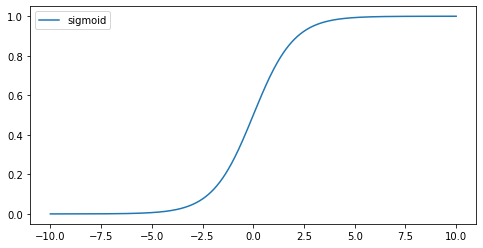

In [ ]:
import matplotlib.pyplot as plt

X = np.linspace(-10, 10, 1000)
y = np.tanh(X * 0.5) * 0.5 + 0.5

plt.figure(figsize=(8, 4))
plt.plot(X, y, label='sigmoid')
plt.legend()
plt.show()

위 그래프를 보면 알 수 있듯이, 시그모이드 함수의 y값은 0과 1 사이라서, 보통 확률로 해석하기 위해, 활성화 함수로 많이 사용한다.

#### 4.6.3 결정 경계

로지스틱 회귀를 설명하기 위해 붓꽃 데이터셋을 사용하겠다.

먼저 데이터를 로드한다.

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

로지스틱 회귀 모델을 훈련시킨다.

In [ ]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

꽃잎의 너비가 0 ~ 3cm인 꽃에 대해 모델의 추정 확률을 계산해본다.

/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


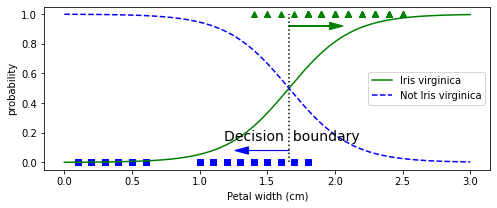

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], 'bs')
plt.plot(X[y==1], y[y==1], 'g^')
plt.plot([decision_boundary, decision_boundary], [0., 1.], 'k:')
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris virginica')
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.legend()
plt.xlabel('Petal width (cm)')
plt.ylabel('probability')
plt.show()

Iris-verginica의 꽃잎 너비는 1.4cm ~ 2.5cm에 분포한다. 반면 다른 붓꽃은 일반적으로 꽃잎 너비가 더 작아 0.1 ~ 1.8cm에 분포한다. 위 그래프에서 보며 알 수 있듯이 꽃잎 너비가 1.6cm 근방에서 결정 경계(decision boundary)가 만들어진다.

다음으로는 같은 데이터셋으로 꽃잎 너비와 꽃잎 길이 2개의 특성을 좌표로 표시한후, 결정 경계를 직성 방정식으로 표현해보겠다.

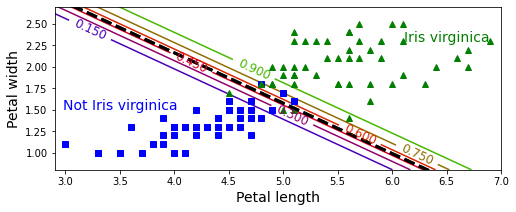

In [ ]:
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.int)

log_reg = LogisticRegression(solver='lbfgs', C = 10 * 10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 500).reshape(-1, 1)
)

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

# 결정 경계 직선 계산
left_right = np.array([2.9, 7])
boundary = -(log_reg.intercept_[0] + log_reg.coef_[0][0] * left_right) / log_reg.coef_[0][1]

plt.figure(figsize=(8, 3))
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

plt.plot(left_right, decision_boundary, 'k--', linewidth=3)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bs')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'g^')
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

위 그래프의 점선이 모델이 50% 확률을 추정하는 지점으로, 모델의 결졍 경계이다.

> `LogisticRegression()` 모델의 규제 강도를 조절하는 하이퍼파라미터는 alpha의 역수인 C이다. C가 높을 수록 모델의 규제는 줄어든다.

#### 4.6.4 소프트맥스 회귀

로지스틱 회귀 모델은 여러 개이 이진 분류기를 훈련시켜 연결하지 않고, 다중 클래스를 지원하도록 일반화될 수 있다. 이를 소프트맥스 회귀(softmax regression) 또는 다항 로지스틱 회귀(multinomial logistic regression)라고 한다.

소프트맥스 회귀는 로지스틱 회귀에서 활성화 함수를 시그모이드 함수 대신 소프트맥스 함수를 사용한 것이다. 식은 다음과 같다.

> S<sub>k</sub>(X) = (𝜃<sup>(k)</sup>)<sup>T</sup>X <br>
p<sub>k</sub> = σ(s(X))<sub>k</sub> = exp(s<sub>k</sub>(X)) / sum(exp(s<sub>j</sub>(X)))

로지스틱 회귀 분류기와 마찬가지로 소프트맥스 회귀 분류기 또한 추정 확률이 가장 높은 클래스를 선택한다.

> y = argmax(σ(s(X))<sub>k</sub>)

> 소프트맥스 회귀 분류기는 한 번에 하나의 클래스만 예측하므로, 하나의 사진에서 여러 사람의 얼굴을 인식하는 데는 사용할 수 없다.

이 모델은 훈련할 때, 크로스 엔트로피 함수를 사용하며, 공식은 다음과 같다.

> J(𝛩) = -sum(y<sub>k</sub><sup>(i)</sup>log(p<sub>k</sub><sup>(i)</sup>)

이 함수의 그레이디언트 벡터는 다음과 같다.

> ∇<sub>𝜃<sup>k</sup></sub> = sum(p<sub>k</sub><sup>(i)</sup> - y<sub>k</sub><sup>(i)</sup>)X<sup>(i)</sup>

사이킷런의 `LogisticRegression()` 클래스는 클래스가 둘 이상일 때, OvA 전략을 사용한다. 그러나 파라미터를 `multi_class = 'multinomial'`로 설정하면 소프트맥스 회귀를 적용한다.

In [ ]:
X = iris['data'][:, (2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

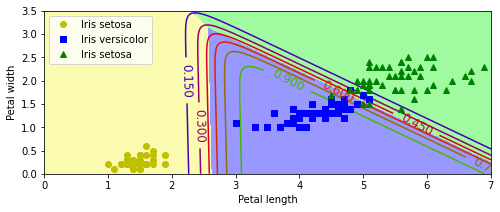

In [ ]:
x0, x1 = np.meshgrid(
  np.linspace(0, 8, 500).reshape(-1, 1),
  np.linspace(0, 3.5, 200).reshape(-1, 1),
)

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(8, 3))

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap = custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap = plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(X[y==0, 0], X[y==0, 1], 'yo', label='Iris setosa')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='Iris versicolor')
plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label='Iris setosa')
plt.legend()
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.axis([0, 7, 0.0, 3.5])
plt.show()